# Análisis exploratorio de datos multivariable


## Objetivo

Identificar las correlaciones que existen en las variables para así poder formular hipótesis sobre relaciones causa-efecto.

## Técnicas de análisis

1. [Covarianza](#1)
2. [Coeficiente de correlación](#2)
3. [Visualización de la relación entre dos variables](#3)
4. [Variables cualitativas](#4)
    1. [Crosstabs](#5)
    2. [Pivot table (Tablas de contingencia)](#6)

## Carga de datos
__[Fuente de datos](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)__

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Covarianza
<a id="1"></a>

Mide la relación lineal entre dos variables (si incrementan o decrementan juntas). Una covarianza positiva indica que las variables se mueven en la misma dirección y un covarianza negativa que las variables cambian en direcciones opuestas. Sin embargo, **no permite valorar la intensidad de la relación.**

<img src="./img/14-covarianza.png" style="width:600px"/>

In [2]:
np.cov(tips['total_bill'], tips['tip'])

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

In [3]:
tips.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


### Coeficiente de correlación 
<a id="2"></a>

Al igual que la covarianza mide la dirección pero tambien la intensidad de la relación. Es importante recordar que  __[correlación no implica causalidad](https://www.gaussianos.com/hay-que-decirlo-mas-correlacion-implica-causalidad/)__

<img src="./img/15-correlacion.png" style="width:600px"/>

<img src="./img/16-rango-correlacion.png" style="width:600px"/>

Un coeficiente de correlación igual a cero no necesarimente implica que las variables sean independientes. Dos variables independientes tendrán un coefiente de correlación de cero. Por esta razón, **el cálculo del coeficiente de correlación debe ser complementado con la exploración visual de los datos.**. 

Tambien es importante recordar que el índice de correlación ***sólo indica relaciones lineales entre las variables***. Por tanto, no indica las relaciones no lineales que pudieran existir entre las variables. Por ejemplo, en la ecuación y=x^2, las variables tendrán una correlación de 0 a pesar de estar claramente relacionadas.

<img src="./img/17-correlacion-cero-no-implica-independencia.png" style="width:600px"/>

In [4]:
np.corrcoef(tips['total_bill'], tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [5]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## Visualización de la relación entre dos variables

<a id="3"></a>

__[Seaborn](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)__

__[matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html?highlight=axvline)__

<AxesSubplot:title={'center':'scatter plot : Tip by Total bill'}, xlabel='total_bill', ylabel='tip'>

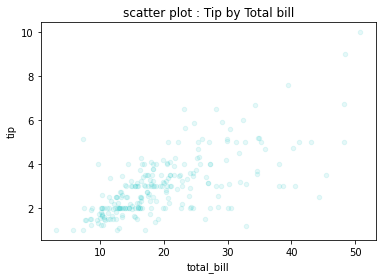

In [6]:
tips.plot.scatter(x='total_bill', y='tip', color='c', title='scatter plot : Tip by Total bill', alpha=0.1)

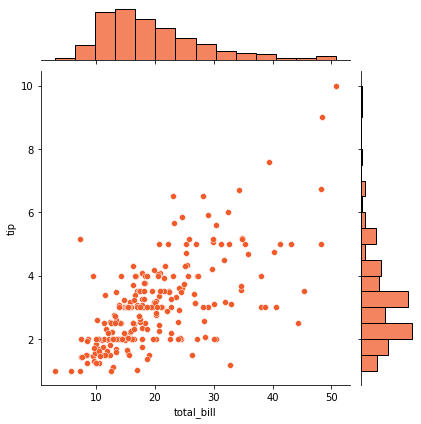

In [7]:
sns.jointplot(x='total_bill', y='tip', data=tips, color='#F15B2A')

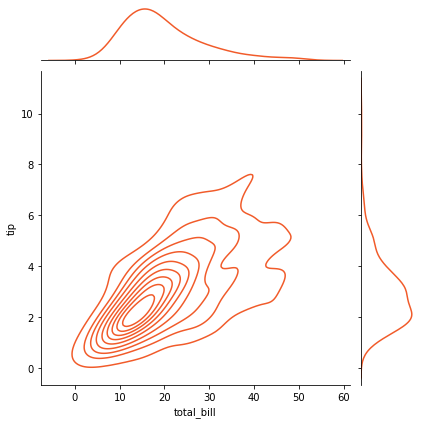

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips, color='#F15B2A', kind='kde')

## Variables cualitativas

<a id="4" ></a>

### Crosstabs

<a id="5" ></a>

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
#Conteos de la combinacion de variables nominales
pd.crosstab(tips["smoker"], tips["sex"])

sex,Male,Female
smoker,,
Yes,60,33
No,97,54


<AxesSubplot:xlabel='smoker'>

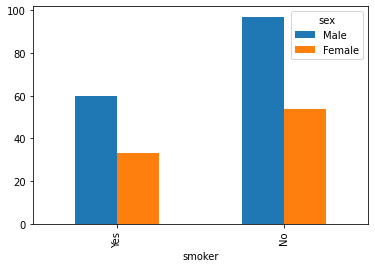

In [11]:
pd.crosstab(tips["smoker"], tips["sex"]).plot(kind='bar')

### Pivot (tablas de contingencia)

<a id="6" ></a>

Es una extensión del crosstab que permite analizar dos variables categóricas y una numérica.

<img src="./img/18_pivot_table.png" style="width:600px"/>

In [12]:
tips.pivot_table(index='time',columns = 'smoker',values='tip', aggfunc='mean')

smoker,Yes,No
time,,
Lunch,2.834348,2.673778
Dinner,3.066000,3.126887


In [13]:
tips.groupby(['time','smoker'])['tip'].mean()
#type(tips.groupby(['time','smoker'])['tip'].mean())

time    smoker
Lunch   Yes       2.834348
        No        2.673778
Dinner  Yes       3.066000
        No        3.126887
Name: tip, dtype: float64

In [14]:
tips.groupby(['time','smoker'])['tip'].mean().unstack()

smoker,Yes,No
time,,
Lunch,2.834348,2.673778
Dinner,3.066000,3.126887


<AxesSubplot:xlabel='time'>

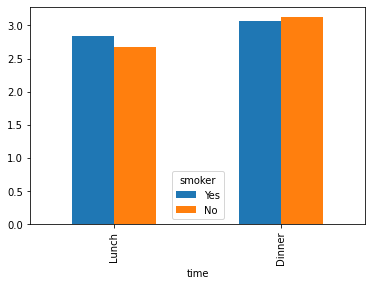

In [15]:
tips.groupby(['time','smoker'])['tip'].mean().unstack().plot.bar()